# correct matrix form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi


In [2]:
# End of trying matrix form with small discretization

# More discretize points

In [3]:
# Again trying with correct domain

In [8]:
N = 70
x = np.linspace(0, np.pi , N)
dx = x[1]-x[0]
x1 = np.linspace(0-dx, np.pi+dx, N+2)
# Initial conditions

u0 = 0*np.sin(x1)
u_1 = 0*u0

# Boundary conditions

u0[0] = 0
u0[-1] = 0

u_2 = np.zeros(u0.shape)

t = 0.0002
tend = pi/2
dt = 0.0001

# Update time with dt for final time simulation 

while t<=tend:
    #l = dt**2*(1-16*np.pi**2)*np.sin(x1[2:N-2])*np.cos(4*np.pi*t)
    l = dt**2*np.exp(-pi*x1[2:N-2]-t)**2
    u_2[2:N-2] = 2*u_1[2:N-2]-u0[2:N-2]+l-(dt**2)/(dx**4)*(u_1[4:N]-4*u_1[3:N-1]+6*u_1[2:N-2]-4*u_1[1:N-3]+u_1[0:N-4])

    u_2[1]= 0   #BCs
    u_2[-2]= 0  # BCs
    u_2[0] = u_2[2]
    u_2[-1] = u_2[-3]
    
    

    u0 = u_1
    u_1 = u_2
    t = t+dt
     

In [5]:
print(dt**2/dx**4) 

0.0023270026195078273


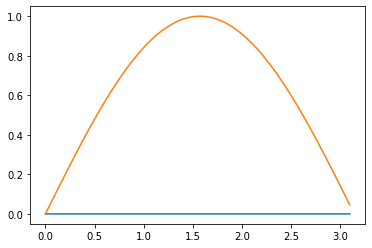

In [9]:
Num = u_2[1:-2]
exact = np.sin(x1[1:-2])*np.cos(4*np.pi*1)
plt.plot(x1[1:-2], Num )
plt.plot(x1[1:-2], exact)



In [10]:

# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((Num - exact)**2)/np.mean(exact**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  99.99987965896229 %


/tmp/ipykernel_6633/3574306257.py:24: RuntimeWarning: overflow encountered in true_divide
  return (u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:]) / dx**4
/tmp/ipykernel_6633/3574306257.py:32: RuntimeWarning: invalid value encountered in subtract
  u[2:-2, 2] = 2*u[2:-2, 1] - u[2:-2, 0] + dt**2*u_xx - dt**2*np.exp(-np.pi*(x[2:-2]-n*dt)**2)
/tmp/ipykernel_6633/3574306257.py:24: RuntimeWarning: invalid value encountered in subtract
  return (u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:]) / dx**4
/tmp/ipykernel_6633/3574306257.py:24: RuntimeWarning: invalid value encountered in add
  return (u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:]) / dx**4


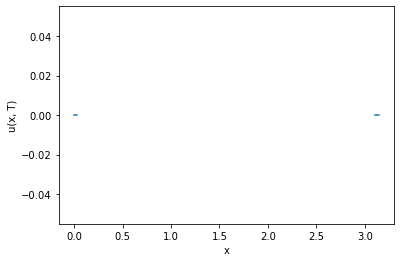

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
L = np.pi  # length of the domain
T = 1.0    # total simulation time
Nx = 100   # number of grid points in space
Nt = 1000  # number of time steps
dx = L/(Nx-1)  # spatial step size
dt = T/Nt      # time step size
x = np.linspace(0, L, Nx)  # spatial grid

# Define the initial conditions
u = np.zeros((Nx, 3))  # initialize u with three columns for the leapfrog method
u[:, 0] = np.exp(-np.pi*x**2)  # u(x, 0)
u[:, 1] = u[:, 0] - 0.5*dt**2*np.exp(-np.pi*(x-dt)**2)  # u_t(x, 0)

# Define the boundary conditions
u[0, :] = 0
u[-1, :] = 0

# Define the second order central difference operator for the fourth derivative
def D4(u, dx):
    return (u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:]) / dx**4

# Perform the time integration using the leapfrog method
for n in range(1, Nt+1):
    # Compute the second spatial derivative using central difference
    u_xx = D4(u[:, 0], dx)
    
    # Update u using the leapfrog method
    u[2:-2, 2] = 2*u[2:-2, 1] - u[2:-2, 0] + dt**2*u_xx - dt**2*np.exp(-np.pi*(x[2:-2]-n*dt)**2)
    
    # Apply the boundary conditions
    u[0, 2] = u[-1, 2] = u[1, 2] = u[-2, 2] = 0
    u[2, 2] = u[2, 1] + dx**2/12*u_xx[0]  # u_xx(0, t)
    u[-3, 2] = u[-3, 1] + dx**2/12*u_xx[-1]  # u_xx(pi, t)
    
    # Update u for the next time step
    u[:, 0] = u[:, 1]
    u[:, 1] = u[:, 2]

# Plot the solution
plt.plot(x, u[:, 2])
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
L = np.pi  # length of the domain
T = np.pi  # total simulation time
Nx = 100   # number of grid points in space
Nt = 1000  # number of time steps
dx = L/(Nx-1)  # spatial step size
dt = T/Nt      # time step size
x = np.linspace(0, L, Nx)  # spatial grid

# Define the initial conditions
u = np.zeros((Nx, 3))  # initialize u with three columns for the leapfrog method
u[:, 0] = 0              # u(x, 0)
u[:, 1] = 0              # u_t(x, 0)

# Define the boundary conditions
u[0, :] = 0
u[-1, :] = 0

# Define the second order central difference operator for the fourth derivative
def D4(u, dx):
    return (u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:]) / dx**4

# Perform the time integration using the leapfrog method
for n in range(1, Nt+1):
    # Compute the second spatial derivative using central difference
    u_xx = D4(u[:, 0], dx)
    
    # Update u using the leapfrog method
    u[2:-2, 2] = 2*u[2:-2, 1] - u[2:-2, 0] + dt**2*u_xx - dt**2*np.exp(-np.pi*(x[2:-2]-n*dt)**2)
    
    # Apply the boundary conditions
    u[0, 2] = u[-1, 2] = u[1, 2] = u[-2, 2] = 0
    u[2, 2] = u[2, 1] + dx



In [ ]:
u